In [1]:
%matplotlib inline

In [2]:
import pandas as pd

In [3]:
from platforms.juno_energy import juno_energy
model = juno_energy

# LISA EnergyModel overview

## Find Required frequencies to satisfy throughput
`EnergyModel` knows the CPU capacites at each frequency, and knows about frequency domains. `guess_freqs` tells you which frequencies should be picked for a utilization scenario:

In [16]:
model.guess_freqs([800, 0, 0, 0, 0, 0])

[850000, 450000, 450000, 850000, 850000, 850000]

In [17]:
model.guess_freqs([0, 800, 300, 0, 350, 0])

[700000, 950000, 950000, 700000, 700000, 700000]

## Estimate energy from CPU utilization

This is running on an ARM Juno system, 6 CPUs:
- bigs: 1, 2
- LITTEs: 0, 3, 4, 5

The EnergyModel class lets you estimate power consumption, using a method similar to EAS, using the utilization of each CPU as input.

Utilization means how much time the CPU spends active, in the range 0-1024.

So `[200, 0, 0, 0, 0, 0]` means CPU0 is running a ~20% task or 2 x ~10% tasks, other CPUs are idle

`estimate_from_cpu_util` returns a dictionary mapping topology nodes (keyed by tuple of consituent CPUs) to power estimation.

In [4]:
nrg = model.estimate_from_cpu_util([200, 0, 0, 0, 0, 0])
nrg

{(0,): 28.97872340425532,
 (0, 3, 4, 5): 30.46808510638298,
 (1,): 0.0,
 (1, 2): 24.0,
 (2,): 0.0,
 (3,): 0.0,
 (4,): 0.0,
 (5,): 0.0}

In [5]:
sum(nrg.values())

83.4468085106383

In [6]:
nrg = model.estimate_from_cpu_util([0, 200, 0, 0, 0, 0])
nrg

{(0,): 0.0,
 (0, 3, 4, 5): 17.0,
 (1,): 88.38129496402877,
 (1, 2): 45.33573141486811,
 (2,): 0.0,
 (3,): 0.0,
 (4,): 0.0,
 (5,): 0.0}

In [7]:
sum(nrg.values())

150.7170263788969

## Find best way to distribute work
`get_optimal_placements` takes a map of tasks to task sizes (in 0-1024), and searches for the best allocation of work that minimizes energy without overloading any CPU

Brute force - $O(ncpus ^{ntasks})$. Could be made faster by Doing Computer Science

In [19]:
tasks = {'task1': 150, 'task2': 400}
placements = model.get_optimal_placements(tasks)
placements

[(400, 0, 0, 150, 0, 0),
 (400, 0, 0, 0, 150, 0),
 (150, 0, 0, 0, 0, 400),
 (0, 0, 0, 400, 0, 150),
 (0, 0, 0, 400, 150, 0),
 (400, 0, 0, 0, 0, 150),
 (0, 0, 0, 150, 0, 400),
 (0, 0, 0, 0, 400, 150),
 (150, 0, 0, 400, 0, 0),
 (0, 0, 0, 150, 400, 0),
 (150, 0, 0, 0, 400, 0),
 (0, 0, 0, 0, 150, 400)]

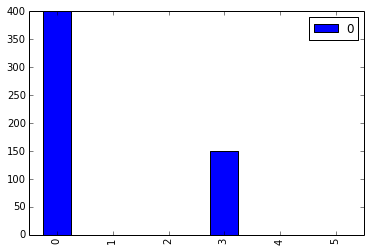

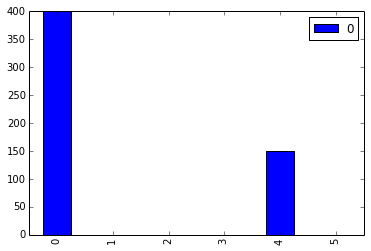

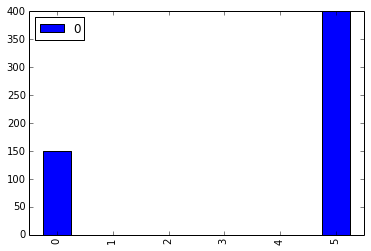

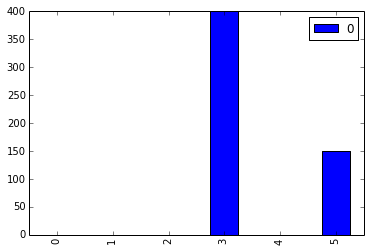

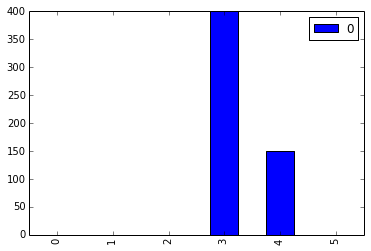

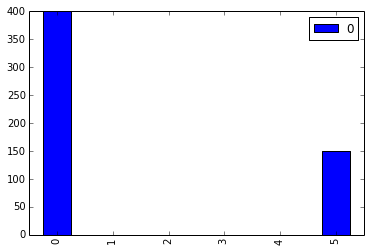

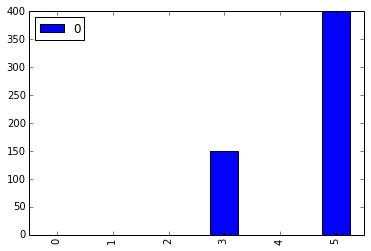

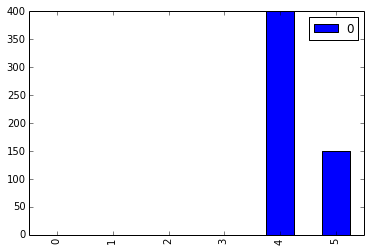

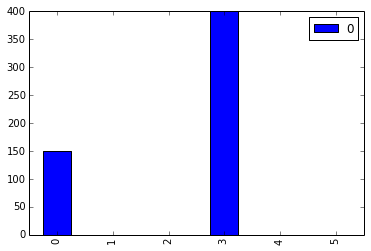

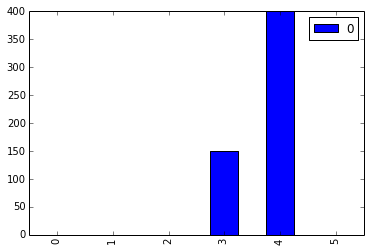

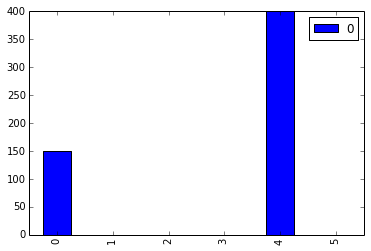

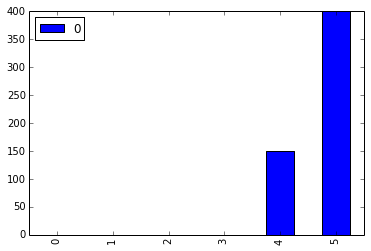

In [9]:
for placement in placements:
    pd.DataFrame(list(placement)).plot(kind='bar')